# Ray for Parallel Processing

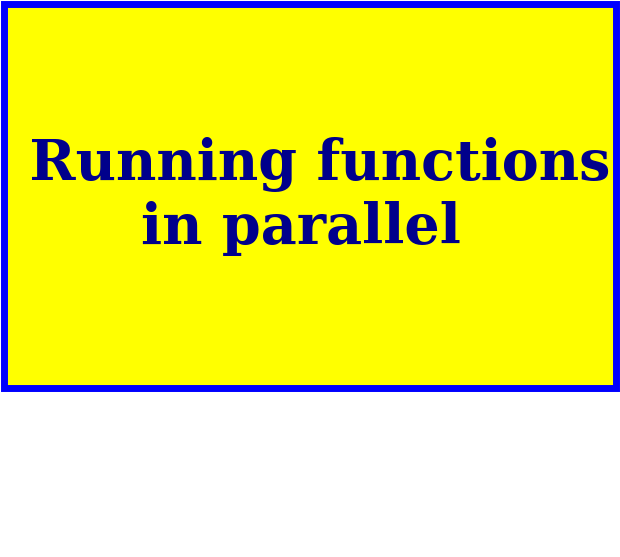

In [57]:
from topic_banner import new_topic
new_topic('Running functions in parallel')

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import time

Calculate the squares of integers from 0 to $n$.

In [59]:
delay = 0.1

def g(x):
    time.sleep(delay)
    return x * x

g(4)

16

In [60]:
[g(x) for x in [0, 4, 8]]

[0, 16, 64]

Now calculate for all sets 0 to $n$ for $n \in [0,20]$.

In [61]:
delay = 0.1

def g(x):
    time.sleep(delay)
    return x * x

results = []  # collect n and execution times 

for n in range(21):  # range(0, 60, 4):
    
    start = time.time()
    result = [g(i) for i in range(n)]
    elapsed = time.time() - start
    
    results.append([n, elapsed])   
    print(results[-1])

results = np.array(results)

[0, 0.00026035308837890625]
[1, 0.10009098052978516]
[2, 0.20011210441589355]
[3, 0.3003096580505371]
[4, 0.4004507064819336]
[5, 0.5005068778991699]
[6, 0.6005604267120361]
[7, 0.7007062435150146]
[8, 0.8007051944732666]
[9, 0.9008066654205322]
[10, 1.0006215572357178]
[11, 1.100799560546875]
[12, 1.2011003494262695]
[13, 1.3012645244598389]
[14, 1.4012067317962646]
[15, 1.5012080669403076]
[16, 1.60154390335083]
[17, 1.7014548778533936]
[18, 1.8016760349273682]
[19, 1.901737928390503]
[20, 2.0018558502197266]


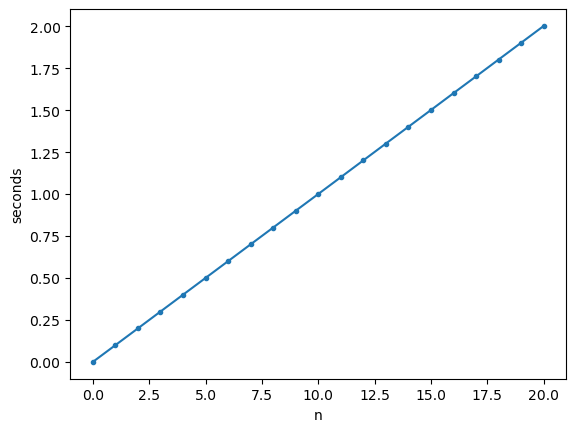

In [62]:
plt.plot(np.array(results)[:, 1], '.-')
plt.xlabel('n')
plt.ylabel('seconds');

# Using `ray` for running functions in parallel

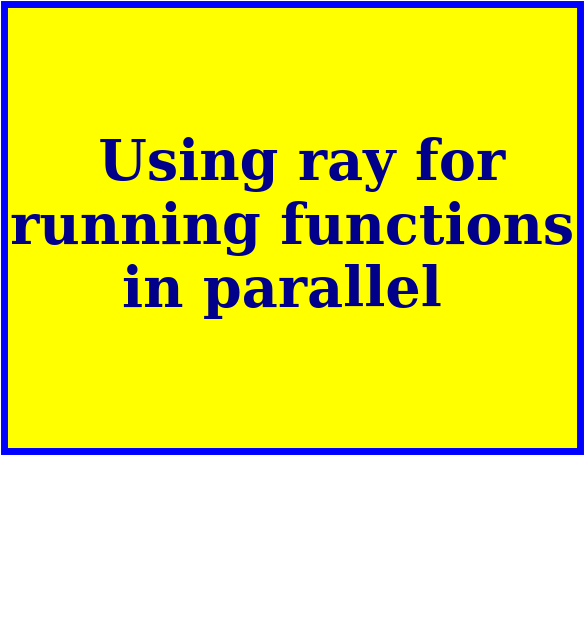

In [63]:
new_topic('Using ray for running functions in parallel')

A nice introduction to using `ray` [is here](https://towardsdatascience.com/10x-faster-parallel-python-without-python-multiprocessing-e5017c93cce1) and also check out [the `ray` documentation](https://www.ray.io/).

Now run again but run for each set in parallel using ray.

In [64]:
import ray
import time
import psutil

In [65]:
psutil.cpu_count()

12

In [66]:
psutil.cpu_count(logical=False)

6

In [67]:
ray.init()

2023-10-30 13:43:00,991	INFO worker.py:1633 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8266 


Python version:,3.11.5
Ray version:,2.7.1
Dashboard:,http://127.0.0.1:8266


In [68]:
ray.shutdown()

In [69]:
ray.init(ignore_reinit_error=True)  # in case we forgot to run ray.shutdown()

delay = 0.1

def g(x):
    time.sleep(delay)
    return x * x

f = ray.remote(g)

# More often we just want the ray version, so can write
# 
# @ray.remote
# def f(x):
#     time.sleep(delay)
#     return x * x

results = []  # collect n and execution times for ray and without ray

for n in range(21):  # range(0, 60, 4):
    
    start = time.time()  
    result = ray.get([f.remote(i) for i in range(n)])
    elapsed_ray = time.time() - start
    
    start = time.time()
    result = [g(i) for i in range(n)]
    elapsed = time.time() - start
    
    results.append([n, elapsed_ray, elapsed])   
    print(results[-1])

results = np.array(results)

ray.shutdown()  

2023-10-30 13:43:07,016	INFO worker.py:1633 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8266 


[0, 0.00033926963806152344, 1.430511474609375e-06]
[1, 0.3285679817199707, 0.1000669002532959]
[2, 0.2803795337677002, 0.20020222663879395]
[3, 0.279221773147583, 0.30025577545166016]
[4, 0.2815115451812744, 0.4003336429595947]
[5, 0.2828977108001709, 0.5004105567932129]
[6, 0.2791304588317871, 0.600560188293457]
[7, 0.2821228504180908, 0.7007367610931396]
[8, 0.29140496253967285, 0.8007087707519531]
[9, 0.28278589248657227, 0.9007184505462646]
[10, 0.28052854537963867, 1.0009477138519287]
[11, 0.28029465675354004, 1.1008834838867188]
[12, 0.29485416412353516, 1.2010626792907715]
[13, 0.2035200595855713, 1.3011460304260254]
[14, 0.20341229438781738, 1.4011509418487549]
[15, 0.20343589782714844, 1.50132417678833]
[16, 0.20344042778015137, 1.6015350818634033]
[17, 0.20383501052856445, 1.7015430927276611]
[18, 0.20386123657226562, 1.8017125129699707]
[19, 0.2041339874267578, 1.901707410812378]
[20, 0.2045574188232422, 2.001640558242798]


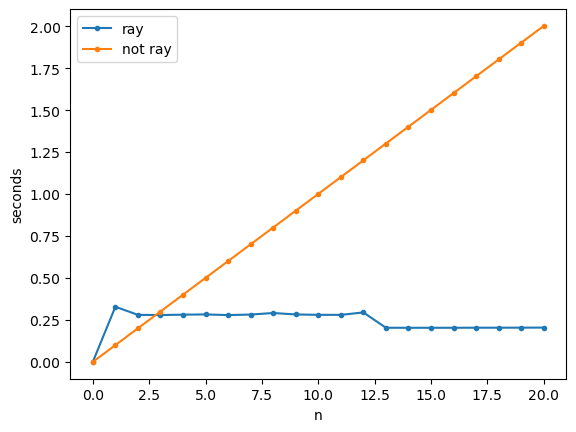

In [70]:
plt.plot(np.array(results)[:, 1:3], '.-')
plt.legend(('ray', 'not ray'))
plt.xlabel('n')
plt.ylabel('seconds');

# Use `ray` to create and use instances of a class in parallel

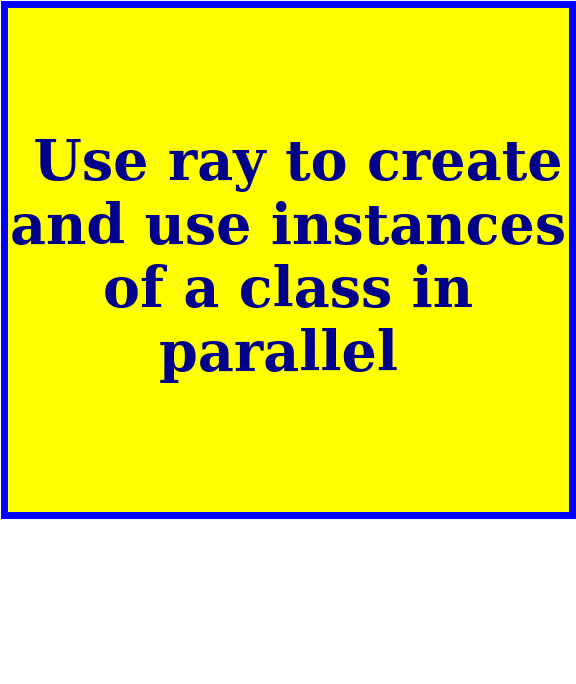

In [71]:
new_topic('Use ray to create and use instances of a class in parallel')

In [72]:
import neuralnetworksA4 as nn
import numpy as np
import matplotlib.pyplot as plt

import ray
import psutil
import time

In [73]:
NeuralNetwork_ray = ray.remote(nn.NeuralNetwork)
NeuralNetwork_ray?

Signature:       NeuralNetwork_ray(*args, **kwargs)
Type:            ActorClass(NeuralNetwork)
File:            ~/cs545/notebooks/neuralnetworksA4.py
Docstring:       <no docstring>
Class docstring:
An actor class.

This is a decorated class. It can be used to create actors.

Attributes:
    __ray_metadata__: Contains metadata for the actor.

PublicAPI: This API is stable across Ray releases.
Init docstring: 
Prevents users from directly inheriting from an ActorClass.

This will be called when a class is defined with an ActorClass object
as one of its base classes. To intentionally construct an ActorClass,
use the '_ray_from_modified_class' classmethod.

Raises:
    ActorClassInheritanceException: When ActorClass is inherited.
    AssertionError: If ActorClassInheritanceException is not raised i.e.,
                    conditions for raising it are not met in any
                    iteration of the loop.
    TypeError: In all other cases.
Call docstring: 
Prevents users from directly 

In [74]:
NeuralNetwork_ray.remote?

Signature: NeuralNetwork_ray.remote(*args, **kwargs)
Docstring:
Create an actor.

Args:
    args: These arguments are forwarded directly to the actor
        constructor.
    kwargs: These arguments are forwarded directly to the actor
        constructor.

Returns:
    A handle to the newly created actor.
File:      ~/anaconda3/lib/python3.11/site-packages/ray/actor.py
Type:      method

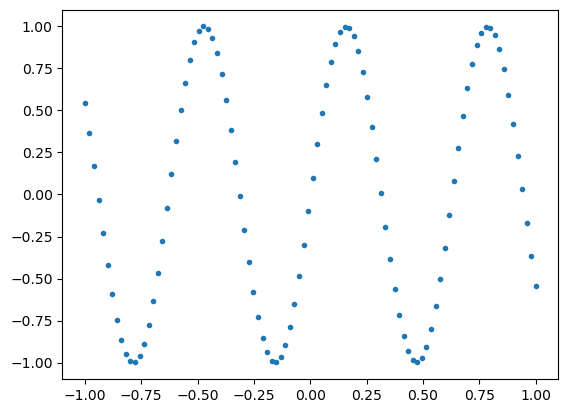

In [75]:
X = np.linspace(-1., 1., 100).reshape(-1, 1)
T = np.sin(X * 10)
plt.plot(X, T, '.');

In [76]:
nnet = NeuralNetwork_ray(1, [5], 1)

TypeError: Actors cannot be instantiated directly. Instead of 'NeuralNetwork()', use 'NeuralNetwork.remote()'.

In [77]:
nnet = NeuralNetwork_ray.remote(1, [5], 1)
nnet

2023-10-30 13:44:23,058	INFO worker.py:1633 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8266 


Actor(NeuralNetwork, f0458b2e936588093f750d9201000000)

In [78]:
nnet.train(X, T, X, T, 100, 'sgd', 0.001)

TypeError: Actor methods cannot be called directly. Instead of running 'object.train()', try 'object.train.remote()'.

In [79]:
nnet.train.remote(X, T, X, T, 100, 'sgd', 0.001)

ObjectRef(7527a481233e71abf0458b2e936588093f750d920100000001000000)

In [80]:
nnet.use(X)

TypeError: Actor methods cannot be called directly. Instead of running 'object.use()', try 'object.use.remote()'.

In [81]:
nnet.use.remote(X)

(NeuralNetwork(1, [5], 1) pid=3392564) SGD: Epoch 10 RMSE= Train 0.99875 Validate 0.99875
(NeuralNetwork(1, [5], 1) pid=3392564) SGD: Epoch 20 RMSE= Train 0.99627 Validate 0.99627
(NeuralNetwork(1, [5], 1) pid=3392564) SGD: Epoch 30 RMSE= Train 0.99382 Validate 0.99382
(NeuralNetwork(1, [5], 1) pid=3392564) SGD: Epoch 40 RMSE= Train 0.99175 Validate 0.99175
(NeuralNetwork(1, [5], 1) pid=3392564) SGD: Epoch 50 RMSE= Train 0.99012 Validate 0.99012
(NeuralNetwork(1, [5], 1) pid=3392564) SGD: Epoch 60 RMSE= Train 0.98886 Validate 0.98886
(NeuralNetwork(1, [5], 1) pid=3392564) SGD: Epoch 70 RMSE= Train 0.98790 Validate 0.98790
(NeuralNetwork(1, [5], 1) pid=3392564) SGD: Epoch 80 RMSE= Train 0.98717 Validate 0.98717
(NeuralNetwork(1, [5], 1) pid=3392564) SGD: Epoch 90 RMSE= Train 0.98662 Validate 0.98662
(NeuralNetwork(1, [5], 1) pid=3392564) SGD: Epoch 100 RMSE= Train 0.98621 Validate 0.98621


ObjectRef(005a9da80ac64db6f0458b2e936588093f750d920100000001000000)

In [82]:
ray.get(nnet.use.remote(X))

array([[-1.37611683e-01],
       [-1.35652423e-01],
       [-1.33647283e-01],
       [-1.31595847e-01],
       [-1.29497756e-01],
       [-1.27352718e-01],
       [-1.25160512e-01],
       [-1.22920987e-01],
       [-1.20634072e-01],
       [-1.18299776e-01],
       [-1.15918194e-01],
       [-1.13489506e-01],
       [-1.11013985e-01],
       [-1.08491994e-01],
       [-1.05923993e-01],
       [-1.03310535e-01],
       [-1.00652273e-01],
       [-9.79499546e-02],
       [-9.52044261e-02],
       [-9.24166294e-02],
       [-8.95876010e-02],
       [-8.67184706e-02],
       [-8.38104582e-02],
       [-8.08648706e-02],
       [-7.78830983e-02],
       [-7.48666105e-02],
       [-7.18169510e-02],
       [-6.87357322e-02],
       [-6.56246299e-02],
       [-6.24853766e-02],
       [-5.93197559e-02],
       [-5.61295948e-02],
       [-5.29167578e-02],
       [-4.96831390e-02],
       [-4.64306556e-02],
       [-4.31612407e-02],
       [-3.98768362e-02],
       [-3.65793860e-02],
       [-3.3

Run all parameter values, first without ray.

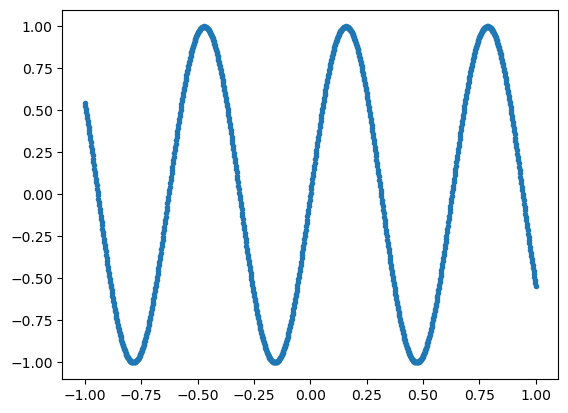

In [83]:
X = np.linspace(-1., 1., 1000).reshape(-1, 1)
T = np.sin(X * 10)
plt.plot(X, T, '.');

In [84]:
hiddens = [ [], [10], [20] ]  # three different networks

In [85]:
start_time = time.time()

parms = []
results = []
for nh in hiddens:
    for method in ['scg', 'sgd']:
        for lr in [0.001, 0.01] if method == 'sgd' else [0.0]:
            for n_epochs in [5000]:
                parms.append([nh, method, lr, n_epochs])

                nnet = nn.NeuralNetwork(1, nh, 1)
                results.append(nnet.train(X, T, X, T, n_epochs, method, lr, verbose=False))

elapsed = time.time() - start_time
print(f'Took {elapsed:.1f} seconds.')

Took 26.6 seconds.


In [86]:
results[0].best_val_error

0.9619672251115521

In [87]:
for p, n in zip(parms, results):
    print(f'{n.best_val_error:.2f}, {p}')

0.96, [[], 'scg', 0.0, 5000]
0.96, [[], 'sgd', 0.001, 5000]
0.96, [[], 'sgd', 0.01, 5000]
0.00, [[10], 'scg', 0.0, 5000]
0.96, [[10], 'sgd', 0.001, 5000]
0.93, [[10], 'sgd', 0.01, 5000]
0.00, [[20], 'scg', 0.0, 5000]
0.95, [[20], 'sgd', 0.001, 5000]
0.69, [[20], 'sgd', 0.01, 5000]


In [88]:
ray.init(ignore_reinit_error=True)
print(f'Running with {psutil.cpu_count(logical=False)} cpus.')

NeuralNetwork_ray = ray.remote(nn.NeuralNetwork)

start_time = time.time()

parms = []
results = []
for nh in hiddens:
    for method in ['scg', 'sgd']:
        for lr in [0.001, 0.01] if method == 'sgd' else [0.0]:
            for n_epochs in [5000]:
                parms.append([nh, method, lr, n_epochs])

                nnet = NeuralNetwork_ray.remote(1, nh, 1)
                results.append(nnet.train.remote(X, T, X, T, 
                                                 n_epochs, method, lr, verbose=False))
# Collect all results when finished.
results = ray.get(results)

elapsed = time.time() - start_time
print(f'Took {elapsed:.1f} seconds.')

for p, n in zip(parms, results):
    print(f'{n.best_val_error:.2f}, {p}')

ray.shutdown()

2023-10-30 13:44:58,746	INFO worker.py:1476 -- Calling ray.init() again after it has already been called.


Running with 6 cpus.
Took 9.2 seconds.
0.96, [[], 'scg', 0.0, 5000]
0.96, [[], 'sgd', 0.001, 5000]
0.96, [[], 'sgd', 0.01, 5000]
0.00, [[10], 'scg', 0.0, 5000]
0.95, [[10], 'sgd', 0.001, 5000]
0.93, [[10], 'sgd', 0.01, 5000]
0.00, [[20], 'scg', 0.0, 5000]
0.96, [[20], 'sgd', 0.001, 5000]
0.82, [[20], 'sgd', 0.01, 5000]


In [89]:
53.6/16.6

3.228915662650602